# Homework 07

`By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

# Task: Logistic Regression basics

## Task: Unnormalized perpendicular distance

Consider a three-class classification problem with the following separating hyperplanes:

\begin{align}
1^{st\:}class\:\:\:\:\:\:4x_1+x_{2\:\:}-2=0 \\
2^{nd\:}class\:\:\:\:\:\:-2x_1+2x_{2\:\:}-11=0 \\
3^{rd\:}class\:\:\:\:\:-3x_1-3x_{2\:\:}-1=0 
\end{align}


Calculate the score (unnormalized perpendicular distance) for each class for the test case $\left(x_1,x_2\right)=\:\left(-1,1\right) $

Complete the code below to get the results

In [5]:
import numpy as np

W = np.transpose(np.array([[4., 1.], 
              [-2., 2.], 
              [-3., -3.]])).reshape(2, 3)
b = np.array([-2.,-11., -1.])
x = np.array([-1., 1.])
#==================================================#
#               Your code starts here              #
#==================================================#
scores= np.dot(x, W) + b
print(np.round(scores,3))
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

[-5. -7. -1.]


## Task:  Log Loss for logistic regression

Consider two points $x_1$   and $x_2$.  $x_1$  belongs to class 0 and $x_2$  belongs to class 1 ( $y_1=0 $ and $y_2=1$) 

A logistic regression model predicts the class of $x_1$  with a probability of 0.3 and predicts the class of $x_2$ with a probability of 0.6

The log loss formula for the binary case is as follows : $-\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) $

where $m$  is the number of data points , log is Natural Logarithm

Calculate the log loss for the points $x_1$  and $x_2$

Please report your answer to three decimal places (e.g., report .4554 as .455).

| point| Class| Probability|
| --- | --- | --- |
|  $x_1$ | 0 | 0.3|
|  $x_2$ | 1 | 0.6|


In [54]:
import numpy as np
def LogLossBinary(actual, predicted, eps = 1e-15): 
    predicted = np.minimum(np.maximum(predicted, eps), 1-eps) #avoid precision problems at 0, and 1
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    return(predicted)
    #return(-1/2 *(y*(np.log(y_hat)) - (1-y)*(np.log(1-y_hat)))
    #return(1)
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
print(f'{np.round(LogLossBinary(np.array([0, 1]),np.array([0.3, 0.6])), 3)}')
print(f'{np.round((- np.log(1-0.3) - np.log(0.6))/2, 3)}')

[0.3 0.6]
0.434


## Task:  Log Loss for multinomial logistic regression

The log loss (aka cross entropy) formula for the multi case is as follows : $$CXE(actual, predicted) = -\frac{1}{m}\sum^m_{i=1}\left(actual_i\cdot\:\log\:\left(predicted_i\right)\:)\right) $$

where $m$  is the number of data points, and $log$ is Natural Logarithm

Complete the code to calculate the CXE for the test cases provided. Verify you response using the sklearn.metrics.log_loss.

Please report your answer to three decimal places (e.g., report .4554 as .455).

In [55]:
import numpy as np
from sklearn.metrics import log_loss
# homemade CXE
def cross_entropy(predictions, targets):
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    m = predictions.shape[0]
    cxe = -1/m*np.sum(targets *(np.log(predictions)))
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#    
    return cxe

# 2 test cases with 4 possible target classes
predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.97]])
targets = np.array([[1,0,0,0],
                   [0,0,0,1]])

homemadeCXE = cross_entropy(predictions, targets)
print(homemadeCXE)
print(np.round(log_loss(targets, predictions),3), 'homemade CXE:', np.round(homemadeCXE,3))

0.7083767843022996
0.708 homemade CXE: 0.708


## Task:  Gradient Descent for logistic regression

Assume you are learning a logistic  regression model  with two a training set consisting of two examples:

$x_1$  = 1 belongs to class 0 ($y_1=0$ )<br />
$x_2$= 2 belongs to class 1 ($y_2=1 $) <br />

The current model weight vector is  W = [1,1], where W[0] denotes the bias term.<br />

Assume a learning rate,  $\alpha= 0.1$ <br />

Assume the gradient is defined as follows:

 $\frac{\delta E}{\delta W} = \frac{1}{m}\sum^m_{i=1}\left(p\left(x_i\right)-y_i\:\right)\cdot X\:\:\:where\:p\left(x\right)\:=\:\frac{1}{1+\:e^{-W^Tx}}\:\: $  and $ m $ is the number of data points

What is the value of W after applying one iteration of gradient descent?

Please report your response to three decimal places.

In [53]:
import numpy as np
X=np.array([[1,1],[1,2]])
w= np.array([1,1])
y= np.array([0,1])
#==================================================#
#               Your code starts here              #
#==================================================#
perpDist= np.dot(X,w.T)
m =X.shape[0]
p =1 / (1 + np.exp(-perpDist)) #sigmoid
gradient = (1/m)*(np.dot((p- y),X))
print(f'predictions: {p}')
print(f'Gradient: {gradient}')
print(f'w before: {w}')
lr = 0.1
print(f'lr * Gradient: {lr *gradient}')
w = w - lr*gradient
print(f'w after: {np.round(w,3)}')       
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

predictions: [0.88079708 0.95257413]
Gradient: [0.4166856  0.39297267]
w before: [1 1]
lr * Gradient: [0.04166856 0.03929727]
w after: [0.958 0.961]


# CIFAR10

DOWNLOAD DATA FROM [HERE](http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) AND PUT IT TO THE DATA FOLDER

The [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. Such a situation is called **multiclass** classification in oppose to **multilabel** classification when each example may have multiple label.

One can see state-of-the-art results [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

In [46]:
import _pickle as cPickle
import tarfile

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Set style for plotting

In [47]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [48]:
np.random.seed(42)

## Data

Unarchive data

In [49]:
tar = tarfile.open("data/cifar-10-python.tar.gz", "r:gz")
tar.extractall("data")
tar.close()

## Reading

Data are stored as a memory dump with python $\text{dict}$ object. It was created using **pickle** function. To read one should "unpickle" it.

In [56]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding="latin1")
    fo.close()
    return dict

Data are also splitted in to 5 pieces for conveniece. Let's read them all and concatenate

In [57]:
for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)

Read test data. In this dataset train/test split is provided by authors of the dataset to be able to consistently evaluate solutions

In [58]:
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

Read meta-information file with the names of the classes

In [59]:
classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]

## Pre-processing

We have too many data

In [60]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 50000
Test size: 10000


Let's take only 10% of them to train faster

In [61]:
subsample_rate = 0.1
np.random.seed(42)

We want to preserve the same quantity ratio between classes. In python such an option is called **stratification**. Let's randomly (with fixed initial seed for the sake of reproducibility) divide part of train data

In [62]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)

The same for test

In [63]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

Indeed, we preserved the number of objects of each class

In [64]:
unique_train = np.unique(y_train, return_counts=True)
list(zip(np.array(classes)[unique_train[0]], unique_train[1]))

[('airplane', 500),
 ('automobile', 500),
 ('bird', 500),
 ('cat', 500),
 ('deer', 500),
 ('dog', 500),
 ('frog', 500),
 ('horse', 500),
 ('ship', 500),
 ('truck', 500)]

## Visualization

For now each object has the following shape

In [65]:
X_train[0].shape

(3072,)

$3072 = 32 \times 32 \times 3$ where $32 \times 32$ is the size of the image in pixels and $3$ is the number of channels (RGB)

To show this array as an image let's reshape it in the needed from with the shape $(32, 32, 1)$

In [66]:
def show_pic(x):
    plt.imshow(x.reshape((3, 32, 32)).transpose(1, 2, 0).astype("uint8"))
    plt.axis("off")

Draw one pic from each class

In [67]:
classes_idx_examples = np.zeros(10, dtype=np.int)
for i in range(10):
    classes_idx_examples[i] = np.where(y_train == i)[0][0]

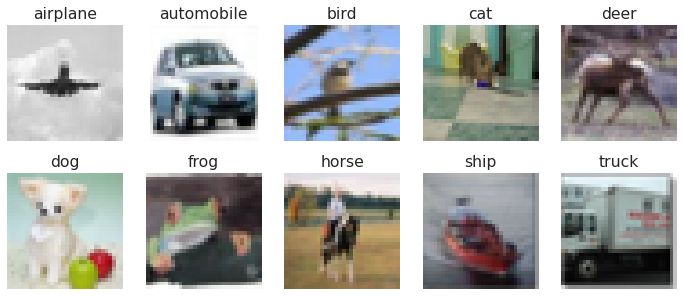

In [68]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    show_pic(X_train[classes_idx_examples[i]])
    plt.title(classes[i])

# Sklearn Logistic Regression

Let's use Sklearn implementation of algorithms to have a benchmark.

Also one should **always** track the results of the experiments to be able to compare different approaches. Let's create pandas $\text{DataFrame}$ for this purpose.

In [69]:
results = pd.DataFrame(columns=["Model", "Test Accuracy"])

For now it is empty, but will be filled in later

In [70]:
results

,Model,Test Accuracy


## Defining model

Let's try Multinomial Logistic Regression (see theory in lectures)
Sklearn implementation of LogRegression implies mandatory usage of regularization (it almost always works better with it preventing overfitting). We want to explore very basic LogRegression model thus to "disable" regularization we need to reduce its impact to almost zero. It can be done by setting regularization constant $\lambda$ to very small value (in sklearn we define inverse regularization constant $C = 1 / \lambda$ thus we need to make it big)

Here we use Sklearn $\text{LogisticRegression}$ with few options:
* $\text{multi_class} = \text{"multinomial"} -$we want to build softmax classifier (there are other ways of dealing with multiclass setting for Logistic Regression)
* $\text{C} = 10^6-$ for now we don't want to use regularization; $\text{C}$ is the inverse regularization constant which is $\text{C} = \frac{1}{\lambda}$; thus we should make $\text{C}$ big to turn off regulazrization
* $\text{solver} = \text{sag} -$ optimization algorithm to use; Stochastic Average Gradient. Stochastic Gradient Descent method gitters massively. This is due to the not very good approximation of gradient (only by one example). To neglect this error one can simply average gradient across last few steps; that is exectly what $\text{sag}$ does
* $\text{max_iter} = 15 -$ the number of passes over the training data (aka epochs)

In [71]:
np.random.seed(42)
model_lr_sklearn = LogisticRegression(multi_class="multinomial", C=1e6, solver="sag", max_iter=15)

### Fitting

In [72]:
model_lr_sklearn.fit(X_train, y_train)

LogisticRegression(C=1000000.0, max_iter=15, multi_class='multinomial',
                   solver='sag')

### Evaluation

Prediction

In [73]:
y_pred_test = model_lr_sklearn.predict(X_test)

Accuracy

In [74]:
acc = accuracy_score(y_test, y_pred_test)

Keeping table of results up-to-date

In [75]:
results.loc[len(results)] = ["LR Sklearn", np.round(acc, 3)]
results

,Model,Test Accuracy
0,LR Sklearn,0.362


Keeping table of results up-to-date

# Assignments begin here

# The Great Race

## BG: Part 1: Pima Diabetes classification

It is important to compare the performance of multiple different machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.

In the example below six different classification
algorithms (some of which you will recognize!) are compared on a single dataset:

*  Logistic Regression
*  Linear Discriminant Analysis
*  k-Nearest Neighbors
*  Classification and Regression Trees
*  Naive Bayes
* Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross-validation procedure is used to
evaluate each algorithm, importantly configured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

### Cross-Validation

The common method to evaluate the model is cross-validation. The idea behind it is to divide the whole set of objects into $k$ sections and then use one section as a test set and other $k-1$ as a train (repeat it with all the sections).

There is a special function for this in sklearn called $\text{KFold}$. It creates set of indices for cross-validation.

In [76]:
#e.g., 
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Next step is to do everything that we've done before in a loop:
* Split
* Train
* Evaluate

And store the average value of the accuracy. Running the code below provides a list of each "algorithm short name", the mean accuracy and the standard deviation accuracy.

LR: 0.776042 (0.045054)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.688927 (0.052095)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


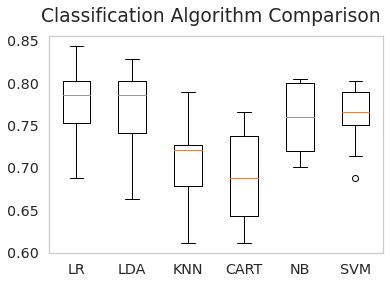

In [78]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
np.random.seed(42)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
#Standardize the data
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.grid()
pyplot.show()

Above we produced a box and whisker plot showing the spread of the accuracy scores
across each cross-validation fold for each algorithm.

From these results, it would suggest that both logistic regression and linear discriminant
analysis are perhaps worthy of further study on this problem.

## Task: CIFAR10 Great Race 
Repeat the above RACE for the CIFAR10 dataset and draw some conclusions. Complete the code below.

### Reload CIFAR-10 dataset

In [80]:
for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)
        
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]
np.random.seed(42)
subsample_rate = 0.02
# Downsample the the train and test sets data
#==================================================#
#               Your code starts here              #
#==================================================#
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)                     
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


### Run Great Race on CIFAR-10 dataset

LR: 0.262000 (0.036551)
LDA: 0.172000 (0.028914)
KNN: 0.248000 (0.041425)
CART: 0.189000 (0.046787)
NB: 0.309000 (0.044373)
SVM: 0.385000 (0.039812)


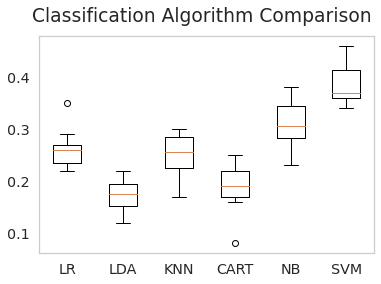

CPU times: user 39min 31s, sys: 2min 40s, total: 42min 11s
Wall time: 30min 1s


In [83]:
%%time
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # set up cross validation scores 
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    # set kfold for 10 folds and random_state=7, also use shuffle=True
    kfold = KFold(n_splits =10, random_state=7, shuffle = True)
    #set cv_results with scoring=scoring variable (which is set to 'accuracy')
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)                        
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.grid()
pyplot.show()

# Background: HyperParameter tuning on steroids

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this section you will revisit how to tune the parameters of machine learning algorithms in Python using the scikit-learn.

Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can perform a grid search using the `GridSearchCV` class. 
In this section we will focus on setting up a pipeline for **text classifiction**, though it can be adapted to any machine learning problem.

## Pima Indian Grid Search  example
The example below evaluates different alpha values for the Ridge Regression/LASSO algorithm on the Pima Diabetes binary classifiction data. This is a one-dimensional grid search.


In [84]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27610844129292433
1.0


## Sample pipeline for text feature extraction and evaluation


The dataset used in this section is the 20 newsgroups dataset which will be
automatically downloaded and then cached and reused for the document
classification example.

<PRE>
>>> from sklearn.datasets import fetch_20newsgroups
>>> newsgroups_train = fetch_20newsgroups(subset='train')

>>> from pprint import pprint
>>> pprint(list(newsgroups_train.target_names))
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
</PRE>
You can adjust the number of categories by giving their names to the dataset
loader or setting them to None to get the 20 of them.

Here is a sample output of a run on a quad-core machine::

<PRE>  Loading 20 newsgroups dataset for categories:
  ['alt.atheism', 'talk.religion.misc']
  1427 documents
  2 categories
  
  
  Performing grid search...
  pipeline: ['vect', 'tfidf', 'clf']
  parameters:
  {'clf__alpha': (1.0000000000000001e-05, 9.9999999999999995e-07),
   'clf__n_iter': (10, 50, 80),
   'clf__penalty': ('l2', 'elasticnet'),
   'tfidf__use_idf': (True, False),
   'vect__max_n': (1, 2),
   'vect__max_df': (0.5, 0.75, 1.0),
   'vect__max_features': (None, 5000, 10000, 50000)}
  done in 1737.030s

  Best score: 0.940
  Best parameters set:
      clf__alpha: 9.9999999999999995e-07
      clf__n_iter: 50
      clf__penalty: 'elasticnet'
      tfidf__use_idf: True
      vect__max_n: 2
      vect__max_df: 0.75
      vect__max_features: 50000
</PRE>

## From documents to a "document by term" frequency matrix  

Convert a set of  documents to a "document by term" frequency matrix

The following corpus: 

`corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]`

gets converted to a "document by term" frequency matrix

`array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]]
       `

where the 9 columns are labeled with the following 9 words extracted:

`['and', 'document', 'first', 'is', 'one',
      'second', 'the', 'third', 'this']`
      
By default, words of length 2 characters or more a kept as the vocabulary.

For more details see (here)[http://scikit-learn.org/stable/modules/feature_extraction.html]

In [85]:
# Let’s use the following corpus (text dataset).
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

In [86]:
#CountVectorizer implements both tokenization and occurrence counting in a single class:
from sklearn.feature_extraction.text import CountVectorizer

# Here we will tokenize and count the word occurrences of this minimalistic corpus of text documents:
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
X                              
#<4x9 sparse matrix of type '<... 'numpy.int64'>'
#    with 19 stored elements in Compressed Sparse ... format>

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [87]:
# The default configuration tokenizes the string by extracting words of at least 2 
# letters. The specific function that does this step can be requested explicitly:  
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (
    ['this', 'is', 'text', 'document', 'to', 'analyze'])

True

In [88]:
vectorizer.get_feature_names() == (
     ['and', 'document', 'first', 'is', 'one',
      'second', 'the', 'third', 'this'])

True

In [89]:
X.toarray()     #recover document by term frequency matrix        
#array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
#       [0, 1, 0, 1, 0, 2, 1, 0, 1],
#       [1, 0, 0, 0, 1, 0, 1, 1, 0],
#       [0, 1, 1, 1, 0, 0, 1, 0, 1]]...)

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

## Text classification pipeline

Note below we use a generic Linear classifier class, SGDClassifier.  Here different classifiers can be engaged by specifying different loss fucntions. Here are some of the options (note we will focus on Logistic regression that is engaged thru specifying the loss as `'log'`:


`loss : str, default: ‘hinge’

The loss function to be used. Defaults to ‘hinge’, which gives a linear SVM.

The possible options are ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, or a regression loss: ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.

The ‘log’ loss gives logistic regression, a probabilistic classifier. ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. ‘squared_hinge’ is like hinge but is quadratically penalized. ‘perceptron’ is the linear loss used by the perceptron algorithm. The other losses are designed for regression but can be useful in classification as well; see SGDRegressor for a description.`

### EDA on 20 newsgroups dataset

The 20 newsgroups dataset has 11314 training examples, 7532 test cases.


#### Training Set

In [90]:
from sklearn.datasets import fetch_20newsgroups
# Uncomment the following to do the analysis on all the categories
categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

trainData = fetch_20newsgroups(subset='train', categories=categories)
data = trainData
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("Sample document Target Class", data.target_names[1], )
print("Sample document body", data.data[1], )
print(len(data.data))

Loading 20 newsgroups dataset for categories:
None
11314 documents
20 categories

Sample document Target Class comp.graphics
Sample document body From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.e

#### Test Set

In [91]:
print(categories)
testData = fetch_20newsgroups(subset='test', categories=categories)
data = testData
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("Sample document Target Class [%s]"% data.target_names[1], )
print("Sample document body", data.data[1], )
print(len(data.data))

None
7532 documents
20 categories

Sample document Target Class [comp.graphics]
Sample document body From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.

Rick Miller  <rick@ee.uwm.edu> | <ricxjo@discus.mil.wi.us>   Ricxjo Muelisto
Send a postcard, get one back! | Enposxtigu bildkarton kaj vi ricevos alion!
          RICK MILLER // 16

In [92]:
print("Number of (Train, Test) data (%d, %d)" %(len(trainData.data),  len(testData.data) ))

Number of (Train, Test) data (11314, 7532)


In [93]:
%%time
# This code is adopted  and has been modified from 
#
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Mathieu Blondel <mathieu@mblondel.org>
# License: BSD 3 clause

from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
%matplotlib inline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set 
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor 
# with a simple classifier (logistic regression)

pipeline = Pipeline([
    ('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    #('tfidf', TfidfTransformer()), #ignore for now
    ('clf', SGDClassifier(loss='log', max_iter=5)),  #let's use logistic regression
])


# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    # jgs 'vect__max_features': (None, 500, 5000, 10000, 50000),
    # jgs 'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l1', 'l2', 'elasticnet'),
    #'clf__penalty': ('l1', 'l2', 'elasticnet'),
    #'clf__loss': ('log', 'hinge'),  #hinge linear SVM
    #'clf__n_iter': (10, 50, 80),
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l1', 'l2', 'elasticnet')}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
done in 11.796s

Best score: 0.889
Best parameters set:
	clf__alpha: 1e-06
	clf__penalty: 'l1'
CPU times: user 2.36 s, sys: 88.9 ms, total: 2.45 s
Wall time: 12.2 s


## Confusion matrices
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

Let's start with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes):

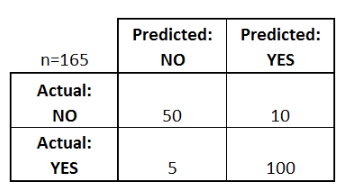


What can we learn from this matrix?

* There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
* The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
* Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
* In reality, 105 patients in the sample have the disease, and 60 patients do not.

Let's now define the most basic terms, which are whole numbers (not rates):

* true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
* true negatives (TN): We predicted no, and they don't have the disease.
* false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

I've added these terms to the confusion matrix, and also added the row and column totals:


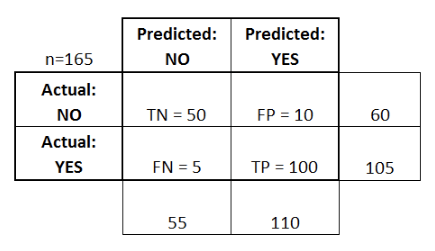
This is a list of rates that are often computed from a confusion matrix for a binary classifier:

* Accuracy: Overall, how often is the classifier correct?
  * (TP+TN)/total = (100+50)/165 = 0.91
* Misclassification Rate: Overall, how often is it wrong?
  * (FP+FN)/total = (10+5)/165 = 0.09
  * equivalent to 1 minus Accuracy
  * also known as "Error Rate"
* True Positive Rate: When it's actually yes, how often does it predict yes?
  * TP/actual yes = 100/105 = 0.95
  * also known as "Sensitivity" or "Recall"
* False Positive Rate: When it's actually no, how often does it predict yes?
  * FP/actual no = 10/60 = 0.17
  * Specificity: When it's actually no, how often does it predict no?
* TN/actual no = 50/60 = 0.83
  * equivalent to 1 minus False Positive Rate
* Precision: When it predicts yes, how often is it correct?
  * TP/predicted yes = 100/110 = 0.91
* Prevalence: How often does the yes condition actually occur in our sample?
  * actual yes/total = 105/165 = 0.64

## Example confusion matrix for the Iris Data

#See labs for this unit for more details of this

In [94]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=1e6, multi_class="multinomial", solver="lbfgs")
model.fit(X_train, y_train)
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)
class_labels = ["setosa", "versicolour", "virginica"]

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix

#See labs for this unit for more details of this
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

Visualize them

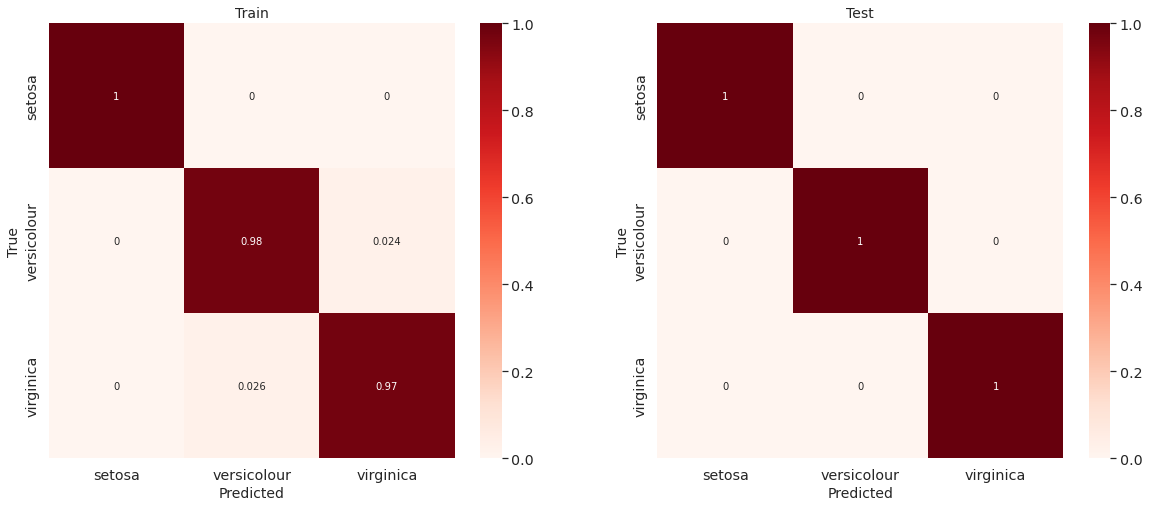

In [96]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);

Looking at the confusions matrices for training, setosa perfectly separates from two other classes. In the test confusion matrix we see perfect classification (very unusual and suspect in the real world)

# Task:  20 class text classifier
Using the gridsearch pipeline presented in the previous section, please adapt it to get your best configuration using cross fold validation on all 20 classes from the 20 newsgroups dataset. Here are some hyperparameters to consider but don't limit yourself to these:

* penalty
* number of terms
* types of ngrams
* linear classifier
* TDIDF


Have fun! Please report your best score and configuration. And discuss your confusion matrix analysis for the best configuration.


##  Task: Pipeline & Grid search

This grid search will take some time (at least 20 minutes or more to run on a 4-core machine). Recall the following GridSearch will use all available cores: 

```python
GridSearchCV(pipelinee, parameters, cv=3, n_jobs=-1, verbose=1)
```

since `n_jobs` is set to `-1` 

Perform grid search where the score being used to evaluate each hyperparameter combination is `precision_macro`.

In [101]:
%%time

from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

%matplotlib inline

##############################################################################
np.random.seed(42)

# Use all categories for the analysis

categories = None

print("Loading 20 newsgroups dataset:")

data = fetch_20newsgroups(subset='train', categories=categories)

print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()


# #############################################################################
# Define a pipeline combining  text feature extractors 
#countVectorizer and TfidfTransformer
# with SGDClassifier using log for loss and max_iter=5
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='log', max_iter=5)),
])                  
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#



if __name__ == "__main__":
    # #############################################################################
    # Set up Grid search using the defined pipeline 
    # and parameters 
    # Make sure to use 3 folds for cross validation
    # use macro average precision scores scoring='precision_macro'
    # I.e., macro average: compute precision for each class and take avg
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    scoring='precision_macro'
    # select handful of parameters to explore
    parameters = {'vect__ngram_range': ((1,1),(1,2)),
                 'tfidf__use_idf': (True, False),
                 'clf__alpha': (.001, .0001), 
                 'clf__penalty': ('l1', 'l2', 'elasticnet'), # please explore different regularization terms ('l1', 'l2', 'elasticnet'),
                  'clf__l1_ratio': (.15,  .50)}
    grid_search = GridSearchCV(pipeline, parameters, cv=3 , n_jobs=-1, verbose=1, scoring='precision_macro')                    
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best parameters set found on development set:")
    print()
    print(grid_search.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
         # print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
         print()

    '''print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(X_test)
    print(classification_report(y_true, y_pred))
    print() 
    '''
    
    scoring='precision_macro'
     # Print best accuracy score and best parameter combination
    print("Best %s score: %0.3f" %(scoring, grid_search.best_score_))
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    #Sort the grid search results in decreasing order of average         
    sortedGridSearchResults = sorted(zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]), 
           key=lambda x: x[1], reverse=True)
    print(f'Top 2 GridSearch results: ({scoring}, hyperparam Combo)\n {sortedGridSearchResults[0]}\n {sortedGridSearchResults[1]}\n\n\n')
    #print(f'{grid_search.cv_results_['mean_test_score']}')
    print(f'{grid_search.cv_results_["mean_test_score"]}')
    print(f'{grid_search.cv_results_["params"]}')
    print(f'{grid_search.cv_results_}')  #show everything  
 

Loading 20 newsgroups dataset:
11314 documents
20 categories

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (0.001, 0.0001),
 'clf__l1_ratio': (0.15, 0.5),
 'clf__penalty': ('l1', 'l2', 'elasticnet'),
 'tfidf__use_idf': (True, False),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 48 candidates, totalling 144 fits
done in 2279.324s

Best parameters set found on development set:

{'clf__alpha': 0.0001, 'clf__l1_ratio': 0.15, 'clf__penalty': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

Grid scores on development set:

















































Best precision_macro score: 0.896
Best parameters set:
	clf__alpha: 0.0001
	clf__l1_ratio: 0.15
	clf__penalty: 'l2'
	tfidf__use_idf: True
	vect__ngram_range: (1, 2)
Top 2 GridSearch results: (precision_macro, hyperparam Combo)
 ({'clf__alpha': 0.0001, 'clf__l1_ratio': 0.15, 'clf__penalty': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}, 0

## Confusion matrix for train data: 

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
preds_train = grid_search.best_estimator_.predict(data.data)

cm_train = confusion_matrix(data.target, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_train.size #20 classes by 20 classes

400

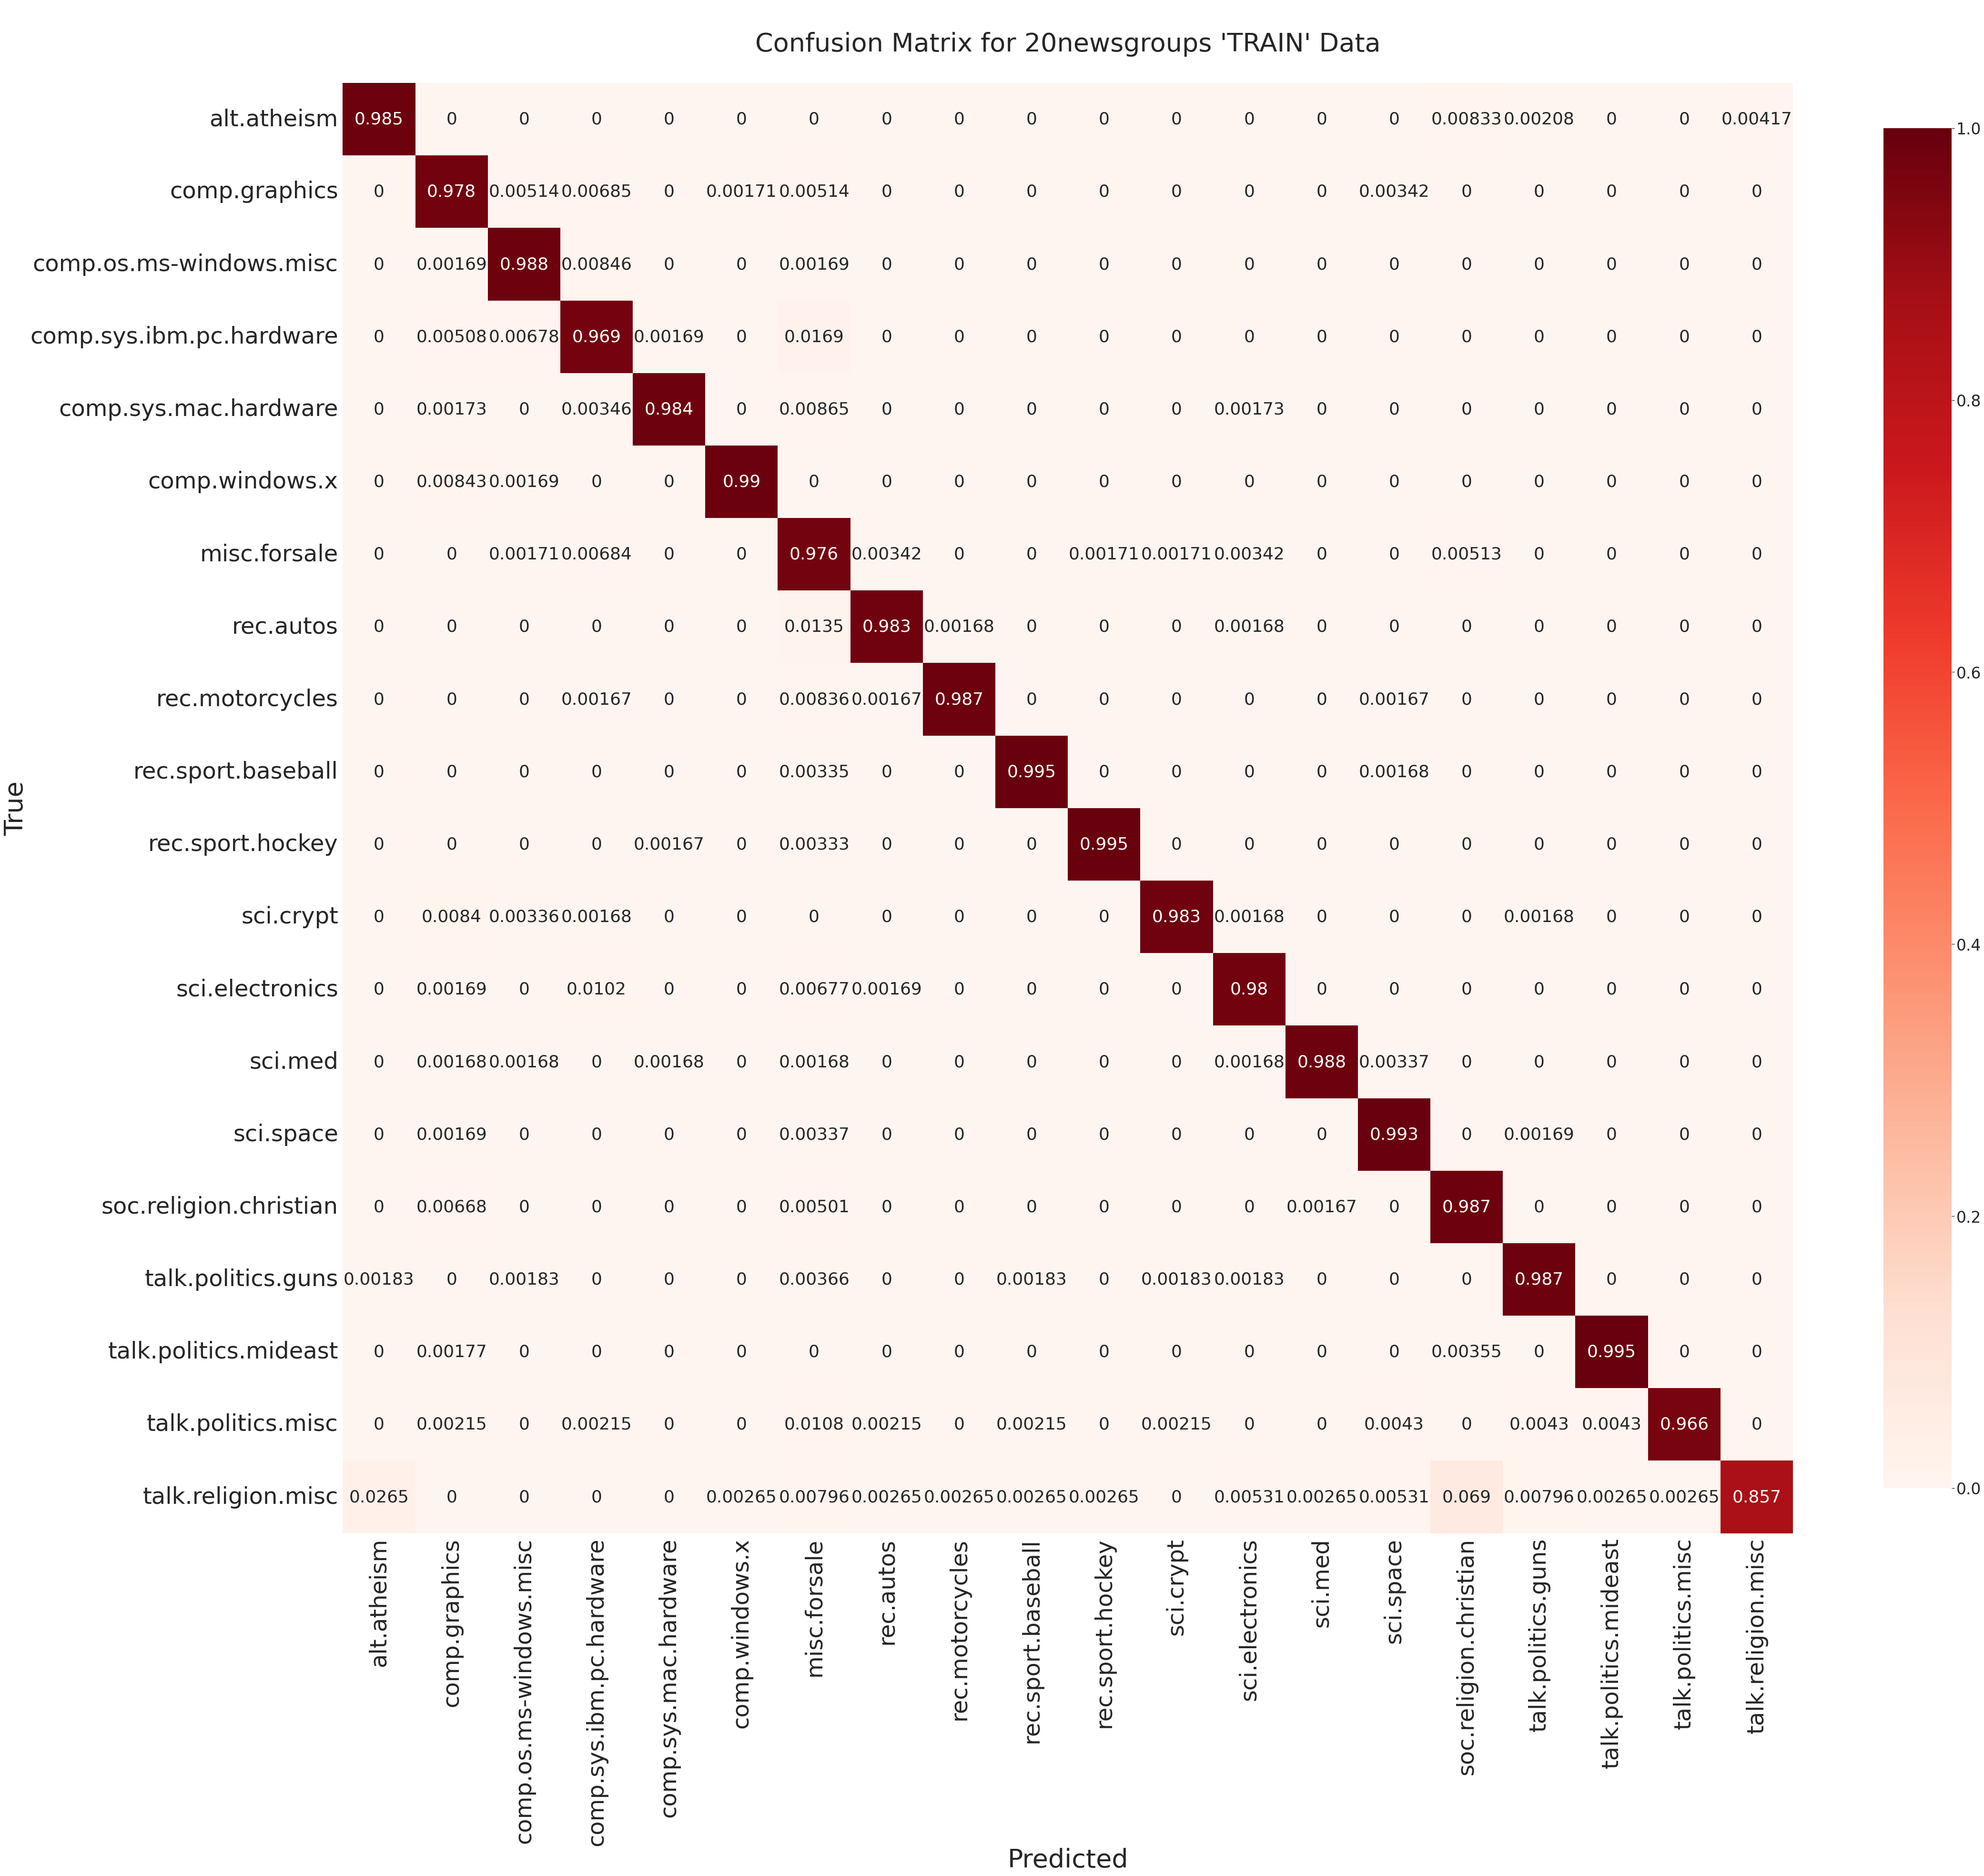

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(150,150))
sns.set(font_scale=3)
plt.subplot(121)
g = sns.heatmap(cm_train, fmt='.3g', vmin=0, vmax=1, annot=True, cmap="Reds", square=True, cbar_kws={'shrink':.35})
plt.xlabel("Predicted", fontsize=54)
plt.ylabel("True", fontsize=54)
g.set(xticklabels=data.target_names, yticklabels=data.target_names)
plt.xticks(rotation='vertical',fontsize=48)
plt.yticks(rotation='horizontal',fontsize=48)
plt.title("\nConfusion Matrix for 20newsgroups 'TRAIN' Data\n", fontsize=54);

## Confusion matrix for test data: 

In [104]:
data = fetch_20newsgroups(subset='test', categories=categories)

In [105]:
preds_train = grid_search.best_estimator_.predict(data.data)

cm_train = confusion_matrix(data.target, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_train.size #20 classes by 20 classes

400

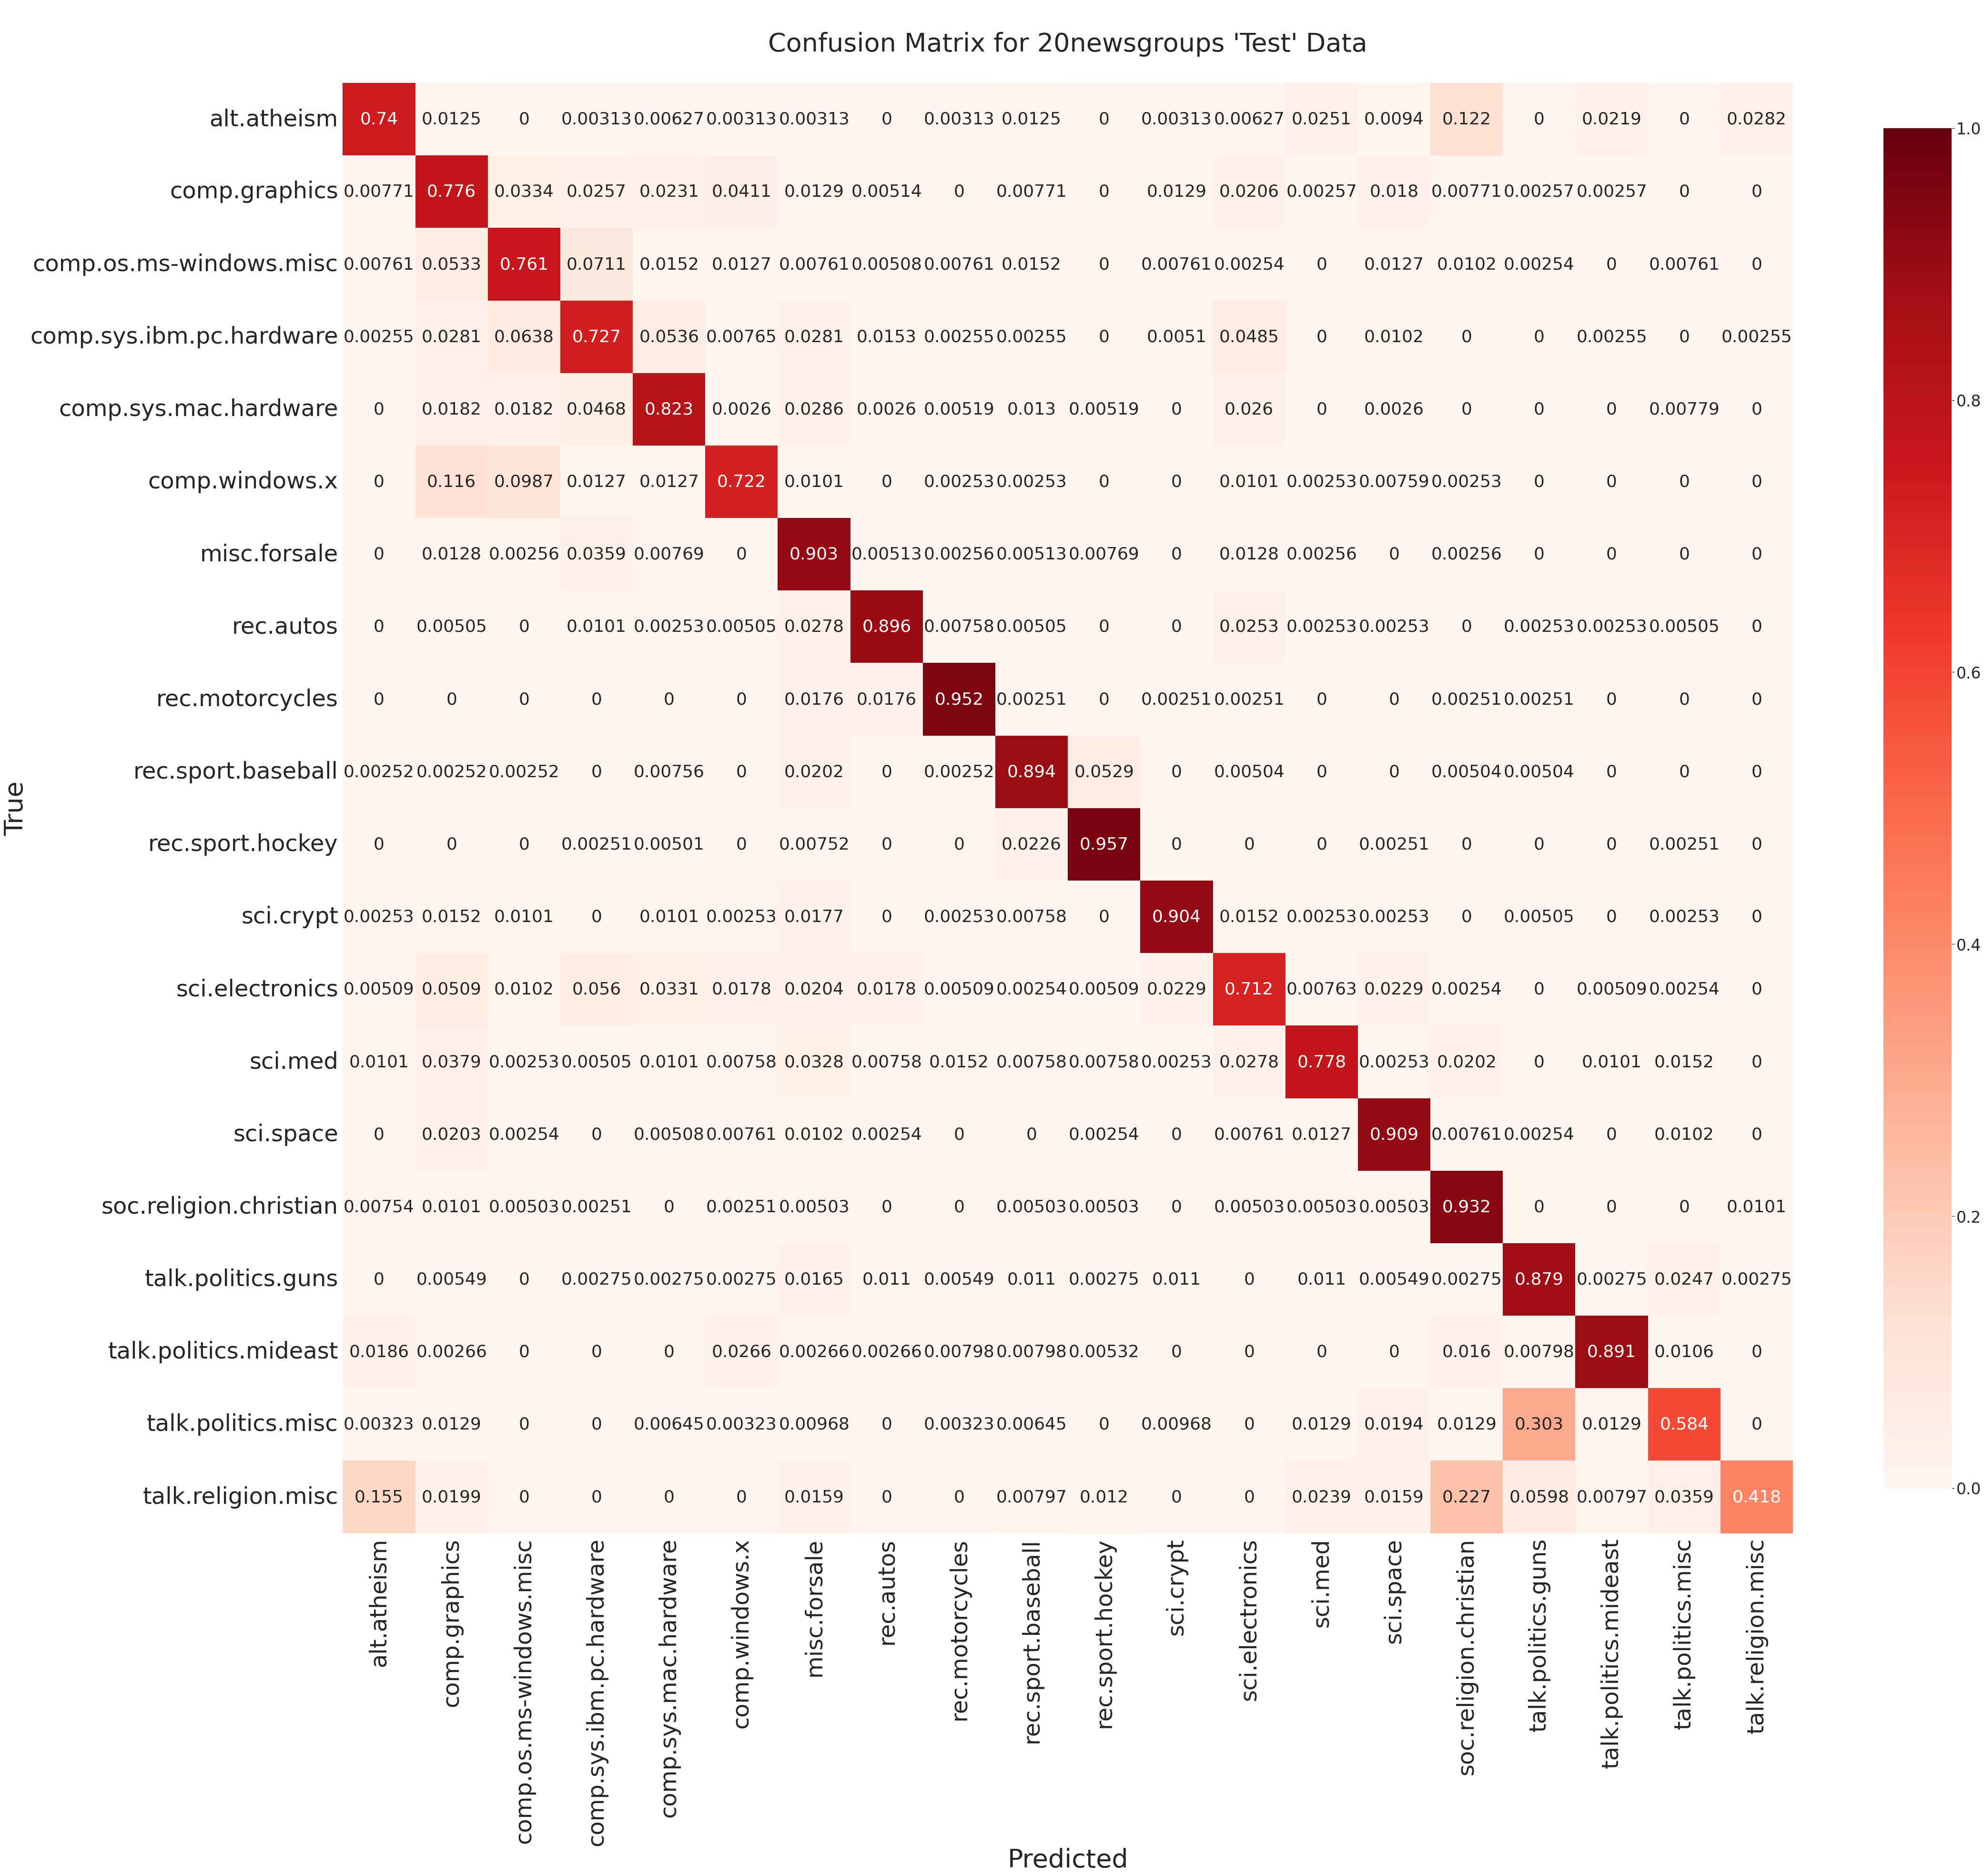

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(150,150))
sns.set(font_scale=3)
plt.subplot(121)
g = sns.heatmap(cm_train, fmt='.3g', vmin=0, vmax=1, annot=True, cmap="Reds", square=True, cbar_kws={'shrink':.35})
plt.xlabel("Predicted", fontsize=54)
plt.ylabel("True", fontsize=54)
g.set(xticklabels=data.target_names, yticklabels=data.target_names)
plt.xticks(rotation='vertical',fontsize=48)
plt.yticks(rotation='horizontal',fontsize=48)
plt.title("\nConfusion Matrix for 20newsgroups 'Test' Data\n", fontsize=54);

# Task: Explore LASSO Logistic Regression
Model the CIFAR-10 dataset using LASSO Logistic Regression (l1 penalty term). Explore different values $\text{C}$ is the inverse regularization constant which is $\text{C} = \frac{1}{\lambda}$ that are listed here : {C=1.0, C=10.0, C=100.0, C=1000.0, C=10000.0}

Please reports your experimental results using the `results` table. Add one more column for reporting the number of zero coefficients after training. Recall, LASSO Logistic Regression can be useful in doing feature selection!   

NOTE: the coefficient of the learnt model, `model_lr_sklearn`, are available via `model_lr_sklearn.coef_`

`coef_ : array, shape (1, n_features) or (n_classes, n_features)

Coefficient of the features in the decision function.

coef_ is of shape (1, n_features) when the given problem is binary.`

 

## Task:  Reload CIFAR-10 dataset and split train/test sets

In [107]:
for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)
        
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]
np.random.seed(42)
subsample_rate = 0.02
##############################################################################
# Set up split for train and test data
# Make sure you are using the stratify parameter,
# setting the random_state to 42 ans using a subset of 2% of the CIFAR10 dataset
#==================================================#
#               Your code starts here              #
#==================================================#
X_train, _, y_train, _ = train_test_split(X_train, y_train , stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)                 
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


In [108]:
X = np.float64(X_train)
y = np.float64(y_train)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_idx = list(cv.split(X, y))

## Task: Lasso Logistic Regression

In [ ]:
from time import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model_coefs = {}
model_acc = {}
model_time = {}
# Inverse of regularization strength; must be a positive float. 
# Smaller values specify stronger regularization.
c_params = [1.0, 10.0, 100.0, 1000.0, 10000.0] 

np.random.seed(42)
#homegrown grid search 
for param in c_params:
    acc = None
    zeros = 0
    start_time = time()
    fold = 1
    for train_idx, val_idx in cv_idx:
        print('Calculating the accuracy score for validation fold',fold,'with C =',param)
        # split
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        ##############################################################################
        # create logistic regression pipeline
        # using StandardScaler() and LogisticRegression(..., solver='saga')
        # using l1 penalty and the parameters defined above
        #==================================================#
        #               Your code starts here              #
        #==================================================#
        pipe = Pipeline([
            ('preprocessing', StandardScaler()),
            ('lasso', LogisticRegression(penalty='l1',solver='saga', C=param)),
        ])     
        #==================================================#
        #               Your code ends here                #
        #               Please don't add code below here   #
        #==================================================#
        pipe.fit(X_train, y_train)
        
        # count zero coefficients
        model = pipe.named_steps['lasso']
        zeros += np.sum(model.coef_==0)
        # generate predictions
        y_pred = pipe.predict(X_val)

        # evaluate
        if acc is None:
            acc = accuracy_score(y_val, y_pred)
        else:
            acc += accuracy_score(y_val, y_pred)
      
        fold += 1
    # take average of accuracy score and count of zero coefficients for each 'C' value
    end_time = time()
    model_coefs[param] = round(float(zeros/cv.n_splits),3)
    model_acc[param] = round(float(acc/cv.n_splits),3)
    model_time[param] = end_time - start_time

Calculating the accuracy score for validation fold 1 with C = 1.0
Calculating the accuracy score for validation fold 2 with C = 1.0
Calculating the accuracy score for validation fold 3 with C = 1.0
Calculating the accuracy score for validation fold 4 with C = 1.0
Calculating the accuracy score for validation fold 5 with C = 1.0
Calculating the accuracy score for validation fold 1 with C = 10.0
Calculating the accuracy score for validation fold 2 with C = 10.0
Calculating the accuracy score for validation fold 3 with C = 10.0


In [ ]:
results = pd.DataFrame(columns=["Model Description", "Avg Val Accuracy", "Average # of Zero Coefficients", "Run time"])
for param in c_params: 
    results.loc[len(results)] = ["Logistic Regression L1 Reg C=" + str(int(param)), 
                                 model_acc[param], model_coefs[param], str(round(model_time[param]/60,2)) + " mins"]
results

# TASK Homegrown implementation of Logistic Regression [OPTIONAL]

Below is a homegrown implementation of Logistic Regression. In this class  we added an ability to trace validation metrics.

In [ ]:
class LogisticRegressionHomegrown(object):
    
    def __init__(self):
        """
        Constructor for the homgrown Logistic Regression
        
        Args:
            None
        
        Return:
            None
        """
        self.coef_ = None       # weight vector
        self.intercept_ = None  # bias term
        self._theta = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self.history = {"cost": [], 
                        "acc": [], 
                        "val_cost":[], 
                        "val_acc": []}
        
    def _grad(self, X, y):
        """
        Calculates the gradient of the Logistic Regression 
        objective function

        Args:
            X(ndarray):    train objects
            y(ndarray):    answers for train objects
            
        Return:
            grad(ndarray): gradient
        """
        # number of training examples
        n = X.shape[0]
        
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(X)
        
        # transform scores to probabilities
        # softmax
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # error
        probs[range(n),y] -= 1
        
        # gradient
        gradient = np.dot(X.T, probs) / n
        
        return gradient
    
    def _gd(self, X, y, max_iter, alpha, X_val, y_val):
        """
        Runs Full GD and logs error, weigths, gradient at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
            
        Return:
            None
        """
        for i in range(max_iter):
            
            metrics = self.score(X, y)
            self.history["cost"].append(metrics["cost"])
            self.history["acc"].append(metrics["acc"])
            
            if X_val is not None:
                metrics_val = self.score(X_val, y_val)
                self.history["val_cost"].append(metrics_val["cost"])
                self.history["val_acc"].append(metrics_val["acc"])

            # calculate gradient
            grad = self._grad(X, y)
            
            # do gradient step
            self._theta -= alpha * grad
    
    def fit(self, X, y, max_iter=1000, alpha=0.05, val_data=None):
        """
        Public API to fit Logistic regression model
        
        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
            
        Return:
            None
        """
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X = np.c_[np.ones(X.shape[0]), X]
        if val_data is not None:
            X_val, y_val = val_data
            X_val = np.c_[np.ones(X_val.shape[0]), X_val]
        else:
            X_val = None
            y_val = None
        # initialize if the first step
        if self._theta is None:
            self._theta = np.random.rand(X.shape[1], len(np.unique(y)))
        
        # do full gradient descent
        self._gd(X, y, max_iter, alpha, X_val, y_val)
        
        # get final weigths and bias
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
    def score(self, X, y):
        """
        Computes logloss and accuracy for (X, y)
        
        Args:
            X(ndarray):      objects
            y(ndarray):      answers for objects
            
        Return:
            metrics(dict):   python dictionary which
                             contains two fields: for accuracy 
                             and for objective function
        """
        # number of training samples
        n = X.shape[0]
        
        # get scores
        scores = self._predict_raw(X)
        
        # trasnform scores to probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # logloss per each example
        corect_logprobs = -np.log(probs[range(n),y])
        
        # total mean logloss
        data_loss = np.sum(corect_logprobs) / n
        
        # predictions
        pred = np.argmax(scores, axis=1)
        # accuracy
        acc = accuracy_score(y, pred)
        
        # final metrics
        metrics = {"acc": acc, "cost": data_loss}
        
        return metrics
        
    def _predict_raw(self, X):
        """
        Computes scores for each class and each object in X
        
        Args:
            X(ndarray):      objects
        
        Return:
            scores(ndarray): scores for each class and object
        """
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            scores = np.dot(X, self._theta)
        else:
            scores = np.dot(X, self.coef_) + self.intercept_
        return scores
    
    def predict(self, X):
        """
        Predicts class for each object in X
        
        Args:
            X(ndarray):      objects
        
        Return:
            pred(ndarray):   class for each object
        """
        # get scores for each class
        scores = self._predict_raw(X)
        # choose class with maximum score
        pred = np.argmax(scores, axis=1)
        return pred

**Do not forget** to scale data before using this class. It is crucial.

## Reload CIFAR-10 dataset and split train/test sets

In [ ]:
for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)
        
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]
np.random.seed(42)
subsample_rate = 0.1
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)


In [ ]:
# scale data 
np.random.seed(42)
if np.max(X_train) > 4.:
    X_train = X_train.astype(np.float32) / 255.
if np.max(X_test) > 4.:
    X_test = X_test.astype(np.float32) / 255.
y_train=y_train.astype(int)
y_test=y_test.astype(int)

Defining a model

In [ ]:
model_lr_homegrown = LogisticRegressionHomegrown()


Fitting example

In [ ]:
model_lr_homegrown.fit(X_train, y_train, max_iter=10, alpha=0.05)

And we come up with all the $\text{nan's}$ for objective function

In [ ]:
model_lr_homegrown.history["cost"]

And accuracy also does not change

In [ ]:
model_lr_homegrown.history["acc"]

In [ ]:
y_preds = model_lr_homegrown.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_preds)

In [ ]:
results = pd.DataFrame(columns=['Model','Accuracy'])

In [ ]:
results.loc[len(results)] = ["LR Homegrown", np.round(acc, 3)]
results

## Task: Softmax Numerical Stability
What can be causing this kind of problem ("NaN")? (Hint: see the lecture slides "Numerical Stability for softmax function")
* Please fix this problem
* Next section has some background to help shed some light

### Working with np.max and matrices
Explore the code in the following section first to see why/how!

In [ ]:
## Working with np.max, softmax, and matrices
import numpy as np

# For more info on np.max check the following link :
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.amax.html

#GOAL: On a per row basis: Substract  max of that row from each element in that row
#ATTEMPT #1: 
f = np.array([[1, 2, 3],[4, 5, 6]])
f1 = f - np.max(f)
# this does not work as expected - as np.max(f) returns the overall max 
print ("Is this correct?")
print ("Adjusted data1", f1)

# take max of f per row 
#ATTEMPT #2: pay attention to axis and keepdims
f2 = f - np.max(f, axis=1, keepdims=True)
print ("Adjusted data2", f2)


#Normalised score to sum to 1
f=([1,3,6], [2,4,6])
p = f / np.sum(f,axis=1, keepdims=True)
print ("Normalised score...\n", p)

# The following data will not work with for the softmax calculation
# out of bounds
perpendicularDistances = np.array([[123, 234, 345],[444, 555, 999]])
probs = np.exp(perpendicularDistances) / np.sum(np.exp(perpendicularDistances), axis=1, keepdims=True)
print("This produces NaNs: (see SECOND ROW) \n", probs)
# need to use adjusted data 
perpendicularDistances -= np.max(perpendicularDistances, axis=1, keepdims=True)
# trasnform scores to probabilities
exp_scores = np.exp(perpendicularDistances)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
print ("Probabilities...\n", probs)

In [ ]:
class FixedLogisticRegressionHomegrown(LogisticRegressionHomegrown):
    
    def __init__(self):
        # call the constructor of the parent class
        super(FixedLogisticRegressionHomegrown, self).__init__()
        
    #==================================================#
    #               Place your code here               #
    #     Redefine a method which causes the error     #
    
    #               Hint: only one method              #
    #==================================================#
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    
    def .......(self, X):
        """
        ...... each class and each object in X
        
        Args:
            X(ndarray):      objects
        
        Return:
            ...(ndarray): ...... each class and object
        """
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            scores = np.dot(X, self._theta)
        else:
            scores = np.dot(X, self.coef_) + self.intercept_
        
        
        
        return ...
    
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#


Defining a model

In [ ]:

model_lr_homegrown_fixed = FixedLogisticRegressionHomegrown()

Fitting example

In [ ]:
model_lr_homegrown_fixed.fit(X_train, y_train, max_iter=2000, alpha=0.05, val_data=(X_test, y_test))

In [ ]:
plt.figure(figsize=(20, 8))
plt.suptitle("Homegrown Logistic Regression")
plt.subplot(121)
plt.plot(model_lr_homegrown_fixed.history["cost"], label="Train")
plt.plot(model_lr_homegrown_fixed.history["val_cost"], label="Test")
plt.legend(loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.subplot(122)
plt.plot(model_lr_homegrown_fixed.history["acc"], label="Train")
plt.plot(model_lr_homegrown_fixed.history["val_acc"], label="Test")
plt.legend(loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Accuracy");

Prediction

In [ ]:
y_pred_test = model_lr_homegrown_fixed.predict(X_test)

Accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred_test)

Keeping table of results up-to-date

In [ ]:
results.loc[len(results)] = ["LR Homegrown Fix 1", np.round(acc, 3)]
results

## Task: improve by tuning training algo.
Look at the plots obtained at the end of task 1 (it fluctuates a lot). This behaviour is very common to stochastic gradient descent. But here we are using full GD. What could be causing this problem? (*Hint*: a hyperparameter of the training algorithm)
* Describe what's going on on the plots that you got
* Try to fix it (*Hint*: you do NOT need to change the class implemented before)

P.S.
Test accuracy before this fix should be about 26%. This should jump to  31% after. 

In [ ]:
np.random.seed(42)
# Use FixedLogisticRegressionHomegrown() to fit a model
# using 6500 for max_iter, a step of 0.02 and 
# X_test, y_test for validation
#==================================================#
#               Your code starts here              #
#==================================================#
model_lr_homegrown_fixed = 
model_lr_homegrown_fixed.fit()             
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


In [ ]:
plt.figure(figsize=(20, 8))
plt.suptitle("Homegrown Logistic Regression")
plt.subplot(121)
plt.plot(model_lr_homegrown_fixed.history["cost"], label="Train")
plt.plot(model_lr_homegrown_fixed.history["val_cost"], label="Test")
plt.legend(loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.subplot(122)
plt.plot(model_lr_homegrown_fixed.history["acc"], label="Train")
plt.plot(model_lr_homegrown_fixed.history["val_acc"], label="Test")
plt.legend(loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Accuracy");

In [ ]:
y_pred_test = model_lr_homegrown_fixed.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_test)

In [ ]:
results.loc[len(results)] = ["LR Homegrown Fix 2", np.round(acc, 3)]
results

** Note: I was able to get about 29% test set accuracy with all the fixes and tunes**

## Task : Visualize the  weight vectors
Visualize the  weight vectors (like images) for each class for both Sklearn learnt model and best homegrown learnt model. Can you see any class patterns? How long did it take to run? in both cases?

### Task : Use all training data and visualize the  weight vectors
Try to use all the training data to learn a classification model  Sklearn and then visual the resulting weight vectors. Notice any differences. How long did it take to run?

In [ ]:
%%time
model_lr_sklearn = LogisticRegression()
model_lr_sklearn.fit(X_train, y_train)

In [ ]:

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    normalized_coef = (model_lr_sklearn.coef_[i] - np.min(model_lr_sklearn.coef_[i])) \
                      / (np.max(model_lr_sklearn.coef_[i]) - np.min(model_lr_sklearn.coef_[i])) * 255.
    show_pic(normalized_coef)
    plt.title(classes[i])
plt.suptitle("Sklearn weight vectors")
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    
    # change the code below in order to normalize the coefficients
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    # Normalize to [0, 1] interval and then scale to [0, 255]
    normalized_coef = (model_lr_sklearn.coef_[i] ........             
    #          
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#

    show_pic(normalized_coef)
    plt.title(classes[i])
plt.suptitle("Homegrown weight vectors")
plt.show()

## T-SNE dimensionality reduction.

See [this](https://www.dropbox.com/s/q0lrqtphxh5j4uv/6-Mapping_Representations-tSNE-visualize-DL-Model-Layers.ipynb?dl=0) notebook and also search materials on the internet (e.g. [this](http://distill.pub/2016/misread-tsne/) one) on T-SNE (t-Distributed Stochastic Neighbor Embedding).

Perform this embedding (there is [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) implementation) on first three classes and 500 examples per each of them (this is done ro reduce the execution time)

In [ ]:
from sklearn.manifold._t_sne import TSNE
tsne = TSNE()

In [ ]:
X_train_transformed = tsne.fit_transform(X_train[(y_train == 0) + (y_train == 1) + (y_train == 2)])
y_train_transformed = y_train[(y_train == 0) + (y_train == 1) + (y_train == 2)]

In [ ]:
plt.figure(figsize=(10, 8))
colors = ["r", "g", "b"]
for cl in range(3):
    idx = y_train_transformed == cl
    plt.scatter(X_train_transformed.T[0][idx], X_train_transformed.T[1][idx], c=colors[cl], label="Class " + str(cl))
plt.legend()
plt.show()